# Examproject

In this notebook we will solve all the question in the 2019 exam set for introduction to programming and numerical analysis

In [1]:
#import libraries
import numpy as np
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import sympy as sm
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#import local modules 
from examproject.humancapital import HumanCapitalAccumulation
from examproject.as_ad import ASAD
from examproject.exchange_economy import ExchangeEconomy

## Human capital accumulation

In this first question we consider a simply two period consumer problem with human capital accumulation

### Question 1

We save the parameters given in the first question

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

h_vec = np.linspace(0.1,1.5,100) 

We call an instance of the class HumanCapitalAccumulation with the parameters given as above

In [3]:
#call instance of class
question1 = HumanCapitalAccumulation(rho,beta,gamma, w, b, Delta, h_vec)

#call solution method for period2 and save data to dataframe
data1 = question1.solution(question1.period2)

,h,best l,best u,work u,unemp u
33,0.566667,1,-0.982353,-0.982353,-1.0


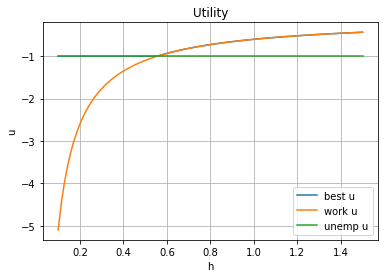

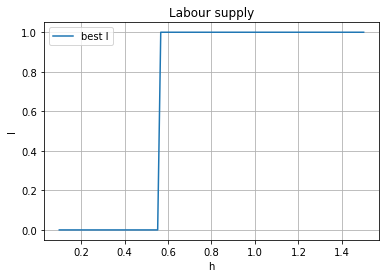

In [4]:
data1.plot(0,[2,3,4])
plt.grid(True)
plt.ylabel("u")
plt.title("Utility")

data1.plot(0,1)
plt.grid(True)
plt.ylabel("l")
plt.title("Labour supply")

data1[data1["unemp u"]<data1["work u"]].head(1)

If the consumer has 0.5667 or above human capital, then working in the second period providers higher utility

### Question 2

In [5]:
#call solution method for period1 from class
data2 = question1.solution(question1.period1)
data2.head()

,h,best l,best u,work u,unemp u
0,0.100000,0,-1.96,-5.613391,-1.96
1,0.114141,0,-1.96,-4.988852,-1.96
2,0.128283,0,-1.96,-4.501010,-1.96
3,0.142424,0,-1.96,-4.109180,-1.96
4,0.156566,0,-1.96,-3.787372,-1.96


,h,best l,best u,work u,unemp u
18,0.354545,1,-1.948004,-1.948004,-1.96


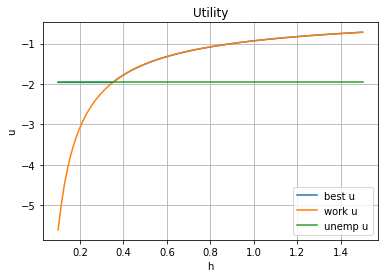

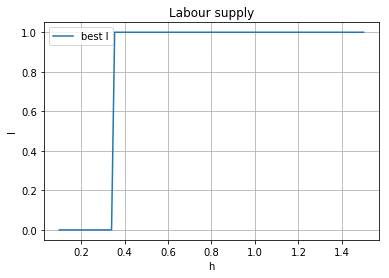

In [6]:
#create h,u plot
data2.plot(0,[2,3,4])
plt.grid(True)
plt.ylabel("u")
plt.title("Utility")

#create h,l plot
data2.plot(0,1)
plt.grid(True)
plt.ylabel("l")
plt.title("Labour supply")

data2[data2["unemp u"]<data2["work u"]].head(1)

With human capital accumulation the workers attains higher expected utility for working at lower levels of human capital. The breakpoint for period 1 is 0.355 human capital

### Question 3

In [7]:
#solving consumer problem for only period1
data3 = question1.solution(question1.utility)

In [8]:
#slice data2 and data3 for entries in which working is optimal
slice1 = data2.loc[data2["best l"]==1]
slice2 = data3.loc[data3["best l"]==1]

#finding difference between slices
diff = slice1[~slice1["h"].isin(slice2["h"])]

In [9]:
print(diff)

           h  best l    best u    work u  unemp u
18  0.354545       1 -1.948004 -1.948004    -1.96
19  0.368687       1 -1.890505 -1.890505    -1.96
20  0.382828       1 -1.837070 -1.837070    -1.96
21  0.396970       1 -1.787270 -1.787270    -1.96
22  0.411111       1 -1.740733 -1.740733    -1.96
23  0.425253       1 -1.697140 -1.697140    -1.96
24  0.439394       1 -1.656210 -1.656210    -1.96
25  0.453535       1 -1.617697 -1.617697    -1.96
26  0.467677       1 -1.581387 -1.581387    -1.96
27  0.481818       1 -1.547089 -1.547089    -1.96
28  0.495960       1 -1.514633 -1.514633    -1.96
29  0.510101       1 -1.483870 -1.483870    -1.96
30  0.524242       1 -1.454666 -1.454666    -1.96
31  0.538384       1 -1.426899 -1.426899    -1.96
32  0.552525       1 -1.400463 -1.400463    -1.96


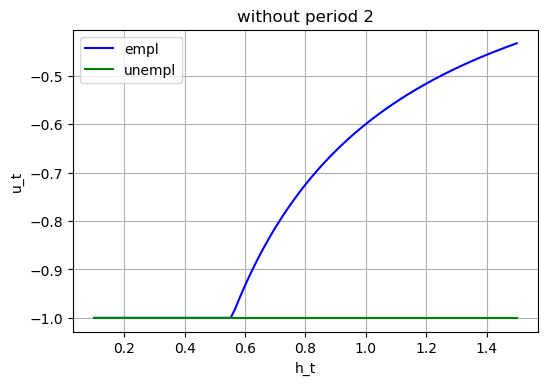

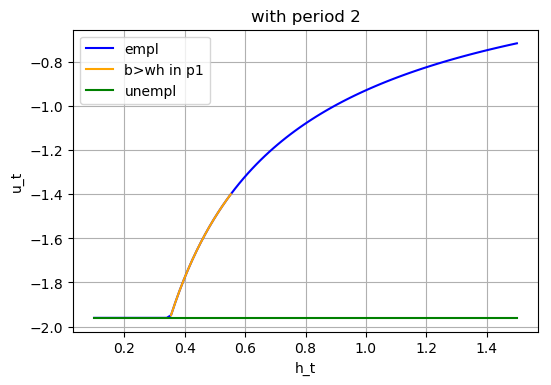

In [10]:
#create figure for utility in period 1 without utility from period 2
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(data3["h"],data3["best u"], label = "empl", color ="b")
ax.plot(data3["h"],data3["unemp u"], label = "unempl", color ="g")
ax.set_title("without period 2")
ax.set_xlabel("h_t")
ax.set_ylabel("u_t")
ax.grid(True)
ax.legend()

#create figure for utility in period 1 with utility from period 2
fig1 = plt.figure(dpi=100)
ax2 = fig1.add_subplot(1,1,1)
ax2.plot(data2["h"],data2["best u"], label = "empl", color="b")
ax2.plot(diff["h"],diff["best u"], label = "b>wh in p1", color="orange")
ax2.plot(data2["h"],data2["unemp u"], label = "unempl", color="g")
ax2.set_title("with period 2")
ax2.set_xlabel("h_t")
ax2.set_ylabel("u_t")
ax2.grid(True)
ax2.legend()

As seen from out plots there exists levels of humancapital, where the potential wage $h_t*w$ is lower than the benefits (marked with orange on lower plot). However, due to human capital accumulation, it becomes optimal to work due to the expected utility for period 2 being higher.

## AS-AD Model

In this question we solve and simulate an AS-AD model

### Question 1

We save the parameters given in the assignment and assign sympy symbols to variables

In [11]:
#parameters
par = {}
par["alpha"] = 5.76
par["h"] = 0.5
par["b"] = 0.5
par["phi"] = 0
par["gamma"]=0.075

#call pretty printing
sm.init_printing(use_unicode=True)

#make symbols
pi_t = sm.symbols('pi_t')
pi_t1 = sm.symbols('pi_t-1')
alpha = sm.symbols("alpha")
h = sm.symbols("h")
b = sm.symbols("b")
phi = sm.symbols("phi")
gamma = sm.symbols("gamma")
v_t = sm.symbols('v_t')
y_t = sm.symbols('y_t')
y_t1 = sm.symbols('y_t-1')
s_t = sm.symbols('s_t')
s_t1 = sm.symbols('s_t-1')

We define the equilibrium condition and solve for the optimal $y_t$

In [12]:
adsras = sm.Eq(1/(h*alpha)*(v_t-(1+b*alpha)*y_t), pi_t1 + gamma*y_t - phi*gamma*y_t1 + s_t - phi*s_t1)
adsras

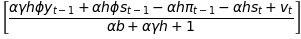

In [13]:
y_sol = sm.solve(adsras, y_t)
y_sol

We use the optimal $y_t$ to find the optimal $\pi_t$

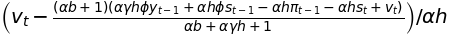

In [14]:
admod = 1/(h*alpha)*(v_t-(1+b*alpha)*y_sol[0])
admod

y_sol and admod gives us the optimal output gap and inflation gap in equilibrium expressed symbolically

### Question 2

We transfrom our symbolical solutions into working python functions with the lambdify. We use these functions to find the outputgap and inflation gap in equilibrium and after the demand shock

In [15]:
#transforming sympy func to python func
_y_sol = sm.lambdify((y_t1, pi_t1, s_t, s_t1 ,v_t, alpha, gamma, h, phi, b), y_sol[0])
_admod = sm.lambdify((y_t1, pi_t1, s_t, s_t1 ,v_t, alpha, gamma, h, phi, b), admod)

#define y_sol
def y_sol(y_t1, pi_t1, s_t, s_t1 ,v_t):
    return _y_sol(y_t1, pi_t1, s_t, s_t1 ,v_t, alpha = par["alpha"], h = par["h"], b = par["b"], phi = par["phi"], gamma = par["gamma"])

#define pi_sol
def pi_sol(y_t1, pi_t1, s_t, s_t1 ,v_t):
    return _admod(y_t1, pi_t1, s_t, s_t1 ,v_t, alpha = par["alpha"], h = par["h"], b = par["b"], phi = par["phi"], gamma = par["gamma"])

In [16]:
#solves equilibrium
y_equil = y_sol(y_t1 = 0, pi_t1 = 0, s_t = 0, s_t1 = 0, v_t = 0)
pi_equil = pi_sol(y_t1 = 0, pi_t1 = 0, s_t = 0, s_t1 = 0, v_t = 0)

#print results
print(f"y in equilibrium:",y_equil)
print(f"pi in equilibrium:",pi_equil)

y in equilibrium: 0.0
pi in equilibrium: 0.0


In [17]:
#solve shock values
y_equil2 = y_sol(y_t1 = 0, pi_t1 = 0, s_t = 0, s_t1 = 0, v_t = 0.1)
pi_equil2 = pi_sol(y_t1 = 0, pi_t1 = 0, s_t = 0, s_t1 = 0, v_t = 0.1)

#print results
print(f"y after shock:",y_equil2)
print(f"pi after shock:",pi_equil2)

y after shock: 0.0244140625
pi after shock: 0.001831054687500002


Further we add a graph showing the shift in the AD curve

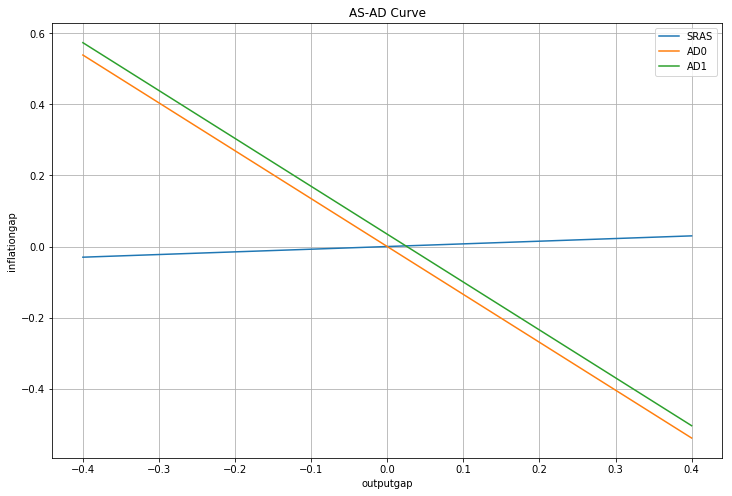

In [18]:
#setup parameters
gamma = par["gamma"]
phi = par["phi"]
h = par["h"]
b = par["b"]
alpha = par["alpha"]
pi_t1 = 0
y_t1 = 0
s_t = 0
s_t1 = 0
v_t = 0

#define y vector
y_vec = np.linspace(-0.4, 0.4, 100)

#call instance of ASAD class with parameters given as above
asad1 = ASAD(gamma, phi, h, b, alpha)

#call sras method from ASAD class
sras1 = asad1.sras(pi_t1, y_vec, y_t1, s_t, s_t1)

#call ad method from ASAD class
ad1 = asad1.ad(v_t, y_vec)
ad2 = asad1.ad(0.1, y_vec)

#create plot with the data
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(y_vec,sras1, label="SRAS")
ax.plot(y_vec,ad1, label="AD0")
ax.plot(y_vec,ad2, label="AD1")
ax.grid(True)
ax.set_xlabel("outputgap")
ax.set_ylabel("inflationgap")
ax.set_title("AS-AD Curve")
ax.legend()

We see a slight shift upwards for the AD curve resulting in higher inflation and output gap

### Question 3

By use of the ar_simulation method we will simulate the development of the economy after the shock. The shocks are defined as autoregressive processes

In [19]:
delta = 0.80
omega = 0.15

#call ar_simulation method from ASAD class
ardata = asad1.ar_simulation(100, omega, delta, phi = asad1.phi)
ardata.head()

,iteration,pi,y,s,v,c,x
0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0
1,1.0,0.001831,0.024414,0.0,0.1000,0.0,0.1
2,2.0,0.003199,0.018244,0.0,0.0800,0.0,0.0
3,3.0,0.004202,0.013375,0.0,0.0640,0.0,0.0
4,4.0,0.004918,0.009545,0.0,0.0512,0.0,0.0


We plot the output gap and inflation gap as a function of time.

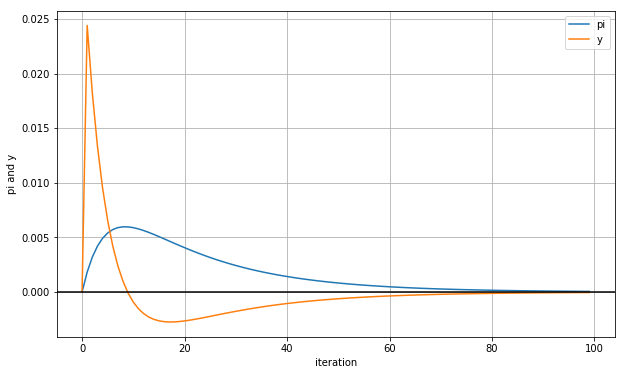

In [20]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(ardata["iteration"], ardata["pi"])
ax.plot(ardata["iteration"], ardata["y"])
ax.set_xlabel("iteration")
ax.set_ylabel("pi and y")
ax.axhline(y=0,color="k")
ax.legend()
ax.grid(True)

We see a spike in the output gap over the first couple of iterations of the simulation. It then converges on a negative value before converging on the equilibrium. Inflationgap doesn't reach the same peak as the outputgap. The chance is slower, and it never becomes negative.

### Question 4

We simulate the stochastic process withe the stoch_simulation method from the ASAD class

In [21]:
#call stoch_simulation method
stochdata = asad1.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = 3.492, sigmac = 0.2, seed = 404, phi=asad1.phi)
stochdata.head(5)

,iteration,pi,y,s,v,c,x
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.001831,0.024414,0.000000,0.100000,0.000000,0.100000
2,2.0,0.012862,0.985219,-0.062861,3.859693,-0.062861,3.779693
3,3.0,0.031249,-1.113500,0.101899,-4.230382,0.111329,-7.318137
4,4.0,-0.228226,-3.105331,-0.026575,-12.705975,-0.041860,-9.321669


From the data we plot the output gap and inflation gap as a function of time. We further create a plot to show the stochastic demand and supply shocks

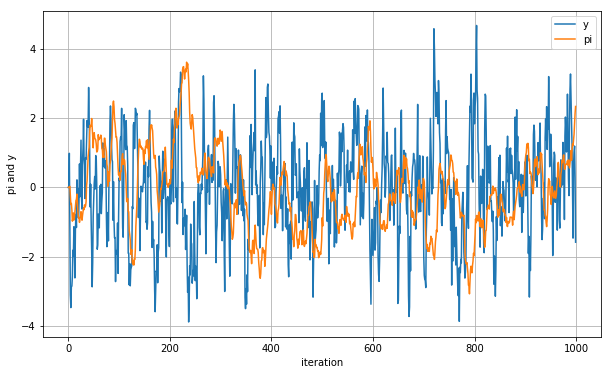

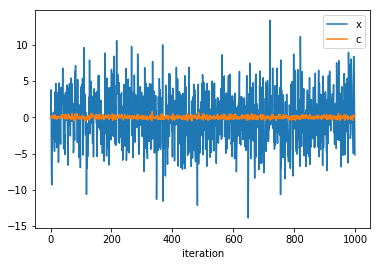

In [22]:
#plotting output and inflation
fig1 = plt.figure(figsize = (10,6))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(stochdata["iteration"], stochdata["y"])
ax1.plot(stochdata["iteration"], stochdata["pi"])
ax1.set_xlabel("iteration")
ax1.set_ylabel("pi and y")
ax1.legend()
ax1.grid(True)

#plotting the stochastic processes
stochdata.plot(0,[6,5])

From the simulated data we calculate several statistics about our stochastic model

In [23]:
#create arrays
yarray = np.array(stochdata["y"])
piarray = np.array(stochdata["pi"])

#print statistics
print(f"y variance is {np.var(yarray):.4f}")
print(f"pi variance is {np.var(piarray):.4f}")
print(f"y-pi corr is {(np.corrcoef(yarray, piarray)[1,0]):.4f}")
print(f"y autocorr is {(np.corrcoef(yarray[1:], yarray[:-1])[1,0]):.4f}")
print(f"pi autocorr is {(np.corrcoef(piarray[1:], piarray[:-1])[1,0]):.4f}")

y variance is 2.0500
pi variance is 1.2927
y-pi corr is -0.1353
y autocorr is 0.7682
pi autocorr is 0.9813


As seen from the plots and the statistics output is more volatile than inflation. The variance is significantly higher while being less autocorrelated. There's a slight negative correlation between inflation and output

### Question 5

In this question we examine the correlation between inflation and output as a function of the parameter $\phi$

Text(0.5, 1.0, 'y-pi corr')

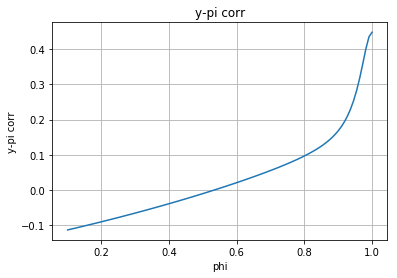

In [24]:
#define correlation as function of phi
def corr_phi_func():
    """Calculates the correlation of inflation and output for different values of phi
    Args:
        None
    
    Returns:
        corrarray (array): array containing correlation data between inflation and output
        phiarray (array): array containing phi data
    """
    #create phi vector
    phi_vec = np.linspace(0.1,1,100)
    
    #allocate space
    corrarray = np.empty(100)
    phiarray = np.empty(100)
    
    #loop for every phi value
    for i, phi in enumerate(phi_vec):
        
        #call instance of ASAD class
        asad2 = ASAD(gamma, phi, h, b, alpha)
        
        #call stoch_simulation method
        stoch2data = asad2.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = 3.492, sigmac = 0.2, seed = 404, phi=asad2.phi)
        
        #save data to array
        corrarray[i] = np.corrcoef(stoch2data["y"], stoch2data["pi"])[1,0]
        phiarray[i] = phi
        
    return corrarray, phiarray

#call corr_phi_func and plot data
corrarray, phiarray = corr_phi_func()
plt.plot(phiarray, corrarray)
plt.xlabel("phi")
plt.ylabel("y-pi corr")
plt.grid(True)
plt.title("y-pi corr")

The correlation between inflation and output is increasing in in $\phi$

Below we define a function corr_func, which is used to find a $\phi$ that ensures a correlation of 0.31 between inflation and output

In [25]:
def corr_func(phi):
    """Function made specifically for a minimizer function
    Args:
        phi (float): parameter
        
    Returns
        square difference of output-inflation correlations and correlation target
    """
    #call instance of ASAD class
    asad2 = ASAD(gamma, phi, h, b, alpha)
    
    #call stoch_simulation method
    stoch2data = asad2.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = 3.492, sigmac = 0.2, seed = 404, phi = asad2.phi)
    
    return (np.corrcoef(stoch2data["y"], stoch2data["pi"])[1,0]-0.31)**2

#call a minimizer to minimize corr_func output
phi_root = optimize.minimize(corr_func,x0=0)
phi_root

      fun: 8.552675723015356e-16
 hess_inv: array([[0.03023896]])
      jac: array([8.65147877e-09])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 6
     njev: 16
   status: 0
  success: True
        x: array([0.96166711])

a $\phi$ value of 0.962 secures us a autocorrelation close to 0.31

### Question 6

In this question we try to construct a minimizer to solve our model for the same statistics as given for the US

In [26]:
def corr_func2(vec):
    """Calculates the squared difference between select statistics and minimizer targets
    
    Args:
        vec (tuple): tuple of the variables phi, sigmax and sigmac
        
    Returns:
        sqlist (list): squared difference between statistics and the target
    """
    #unpack vec
    phi, sigmax, sigmac = vec
    
    #call instance of ASAD class
    asad2 = ASAD(gamma, phi, h, b, alpha)
    
    #call stoch_simulation method
    stoch2data = asad2.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = sigmax, sigmac = sigmac, seed = 404, phi=phi)
    
    #create arrays from data
    yarray = np.array(stoch2data["y"])
    piarray = np.array(stoch2data["pi"])
    
    #calculate squared difference of statistics and targets 
    sq_y_var = (np.var(yarray)-1.64)**2
    sq_pi_var = (np.var(piarray)-0.21)**2
    sq_ypi_corr = (np.corrcoef(yarray, piarray)[1,0]-0.31)**2
    sq_y_auto = (np.corrcoef(yarray[1:], yarray[:-1])[1,0]-0.84)**2
    sq_pi_auto = (np.corrcoef(piarray[1:], piarray[:-1])[1,0]-0.48)**2
    
    #save all to list
    sqlist = [sq_y_var, sq_pi_var, sq_ypi_corr, sq_y_auto, sq_pi_auto]
    
    return sqlist

def corr_min(vec):
    """sums the output of corr_func2
    
    Args:
        vec (tuple): tuple of the variables phi, sigmax and sigmac

    Returns:
        sqsum (float): sum of sqlist
    """
    #save list
    list = corr_func2(vec)
    
    #sum list
    sqsum = sum(list)
    
    return sqsum

#call a minimizer to minimize the output of corr_min function based on the vec tuple
phi_root = optimize.minimize(corr_min, x0 = [0,3.492,0.2], bounds = ((0,1), (10**-6,10**6), (10**-6,10**6)))
phi_root

      fun: 0.02357832638636935
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.62800068e-06, -2.98372438e-08, -3.75047216e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 92
      nit: 14
   status: 0
  success: True
        x: array([0.9717686 , 3.02301921, 0.21947609])

In [27]:
#save minimizer parameters
phi_sol, sigmax_sol, sigmac_sol = phi_root.x

#call new stoch_simulation with new parameters
stochdata = asad1.stoch_simulation(N = 1000, omega = omega, delta = delta, sigmax = sigmax_sol, sigmac = sigmac_sol, seed = 404, phi=phi_sol)

#create arrays
yarray1 = np.array(stochdata["y"])
piarray1 = np.array(stochdata["pi"])

#calculate statistics
print(f"y variance is {np.var(yarray1):.4f}")
print(f"pi variance is {np.var(piarray1):.4f}")
print(f"y-pi corr is {(np.corrcoef(yarray1, piarray1)[1,0]):.4f}")
print(f"y autocorr is {(np.corrcoef(yarray1[1:], yarray1[:-1])[1,0]):.4f}")
print(f"pi autocorr is {(np.corrcoef(piarray1[1:], piarray1[:-1])[1,0]):.4f}")

y variance is 1.6460
pi variance is 0.0718
y-pi corr is 0.2732
y autocorr is 0.7845
pi autocorr is 0.4845


Our minimizer gives us the parameters $\phi = 0.972$, sigmax = 3.023 and sigmac = 0.219.
Our estimate is somewhat close on some statistics compared to the US, however we still fall short on the variance for inflation, and have minor faults on output autocorrelation and inflation/output correlation.

We do not know for certain how precisely our models predict the US economy. The deviations can therefore be the result of a misspecified or ill used model.

## Exchange economy

In this question we solve a simple exchange economy

### Question 1

We save the parameters and other info given in the problem text

In [28]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

#create list from endowments
elist = [e1,e2,e3]

Based on this data we create 3 histograms for the different budget shares for each good.

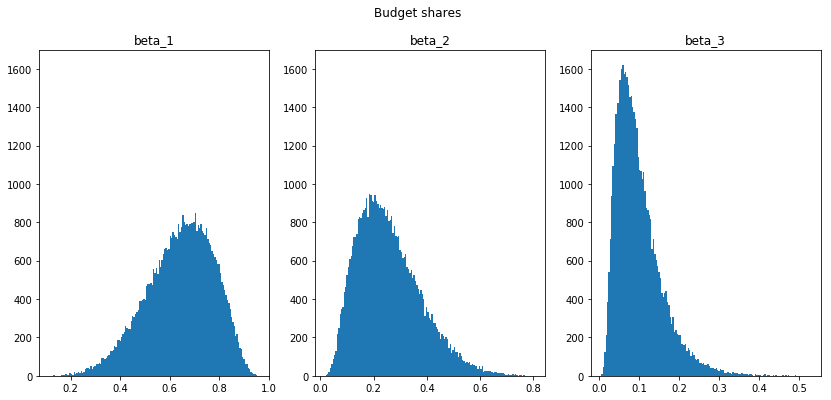

In [29]:
#create figure
fig, axs = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Budget shares')

#define yaxis
ylims = (0,1700)

#create plot for good 1
axs[0].hist(betas[:,0], bins=150)
axs[0].set_title("beta_1")
axs[0].set_ylim(ylims)

#create plot for good 2
axs[1].hist(betas[:,1], bins=150)
axs[1].set_title("beta_2")
axs[1].set_ylim(ylims)

#create plot for good 3
axs[2].hist(betas[:,2], bins=150)
axs[2].set_title("beta_3")
axs[2].set_ylim(ylims)

plt.show()

In [30]:
#print stats for the 3 goods
for i in range(3):
    print(f"mean for beta_{str(i+1)} is {np.mean(betas[:,i]):.4f}")
    print(f"variance for beta_{str(i+1)} is {np.var(betas[:,i]):.4f}")

mean for beta_1 is 0.6423
variance for beta_1 is 0.0182
mean for beta_2 is 0.2581
variance for beta_2 is 0.0142
mean for beta_3 is 0.0996
variance for beta_3 is 0.0033


Good one have the largest budget shares of the three goods with a mean of 0.64, the variance is also the highest. Good 3 has the lowest budget share and variance, while good 2 is in between good 1 and 3

### Question 2

Through our ExchangeEconomy class we create 3 arrays containing the data needed to make the excess demand plots

In [31]:
#define price vector
price_vec = np.linspace(0.5,10,50)

#create grid
price1, price2 = np.meshgrid(price_vec, price_vec) 


def plot3d():
    """calculates excess demand for the 3 goods
    Args:
        None
        
    Returns:
        array1 (array): excess demand for good 1
        array2 (array): excess demand for good 2
        array3 (array): excess demand for good 3
    """
    
    #allocate space
    array1 = np.empty((len(price_vec), len(price_vec)))
    array2 = np.empty((len(price_vec), len(price_vec)))
    array3 = np.empty((len(price_vec), len(price_vec)))
    

    for i, p1 in enumerate(price_vec):
        for j,p2 in enumerate(price_vec):
            
            #call instance of ExchangeEconomy class
            a = ExchangeEconomy(betas, elist, N, p1, p2)
            
            #call excess_demand() method
            z = a.excess_demand()
            
            #save data to arrays 
            array1[i,j] = z[0]
            array2[i,j] = z[1]
            array3[i,j] = z[2]
            
    return array1, array2, array3

#call plot3d function and time it 
%time array1,array2,array3 = plot3d()

Wall time: 5.77 s


Text(0.5, 0, 'p2')

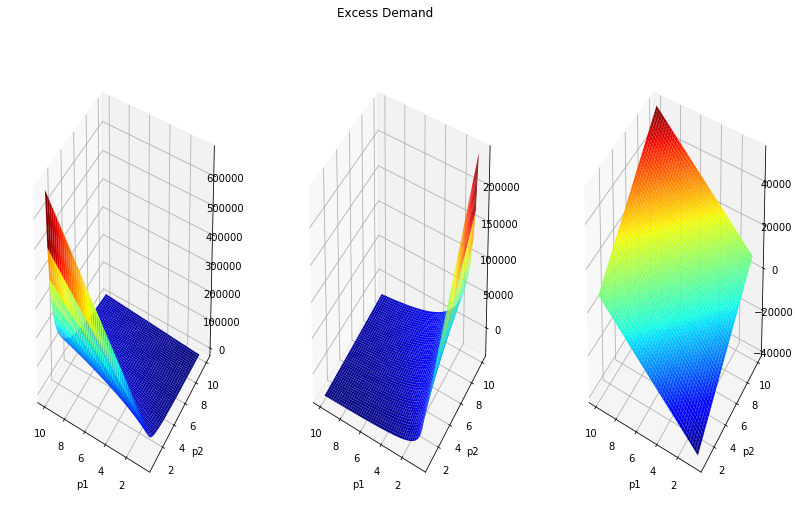

In [32]:
#create the figure
fig = plt.figure(figsize=(14,8))
fig.suptitle('Excess Demand')

#create 3d plot for good 1
ax1 = fig.add_subplot(131,projection='3d')
cs1 = ax1.plot_surface(price1,price2,array1, cmap=cm.jet)
ax1.invert_xaxis()
ax1.set_xlabel("p1")
ax1.set_ylabel("p2")

#create 3d plot for good 2
ax2 = fig.add_subplot(132,projection='3d')
cs2 = ax2.plot_surface(price1,price2,array2, cmap=cm.jet)
ax2.invert_xaxis()
ax2.set_xlabel("p1")
ax2.set_ylabel("p2")

#create 3d plot for good 3
ax3 = fig.add_subplot(133,projection='3d')
cs3 = ax3.plot_surface(price1,price2,array3, cmap=cm.jet)
ax3.invert_xaxis()
ax3.set_xlabel("p1")
ax3.set_ylabel("p2")

The excess demand for good 1 is falling in p2 and rising in p1. The opposite is true for good 2. Good 3 is our numeraire and rises in both p1 and p2 as expected

### Question 3

To find the walras equlibrium prices we call the method walras, which uses the algorithm described in the problem text to numerically find the prices that minimizes the excess demand

In [33]:
#we call an instance of the class ExchangeEconomy
b = ExchangeEconomy(betas, elist, N, 2, 2)

#we call the method walras and time it
%time z = b.walras(kappa=0.15, epsilon=10**-5)
print(z)

Wall time: 20.5 s
(6.490055134537612, 2.6166939963966915)


In [34]:
#unpack z
p1, p2 = z

#call new instance with optimal p1 and p2
c = ExchangeEconomy(betas, elist, N, p1, p2, gamma)

#call excess_demand func
c.excess_demand()

array([ 9.99628537e-06,  3.72918294e-06, -7.46345759e-05])

We get sufficient low excess demand functions with the prices given by the walras method

### Question 4

Once again we make of our class ExchangeEconomy and one of its methods called utility, which calculates the utility for a given equilibrium

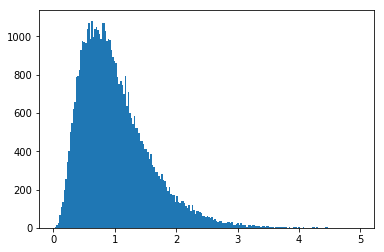

Mean is 1.010
Variance is 0.317


In [35]:
#call utility method
utilarray = c.utility()

#make histogram
plt.hist(utilarray,200)
plt.show()

#print stats
print(f"Mean is {np.mean(utilarray):.3f}")
print(f"Variance is {np.var(utilarray):.3f}")

Mean utility is a bit higher than 1. The distribution is also skewed to the right as seen in the plot. 

### Question 5

We chose to use the mean of the endowments as the fixed and equal value for this question. We define the new parameters and call a new instance of our class ExchangeEconomy

In [36]:
#define new endowments
e1new = np.zeros(N)+np.mean(e1) 
e2new = np.zeros(N)+np.mean(e2)
e3new = np.zeros(N)+np.mean(e3)

#create new list of endowments
newelist = [e1new, e2new, e3new]

#call instance of ExchanceEconomy
e = ExchangeEconomy(betas, newelist, N, 2, 2, gamma)

#solve the walras equilibrium with the walras method
newp1, newp2 = e.walras(0.15, 10**-5)

Mean is 1.046
Variance is 0.003


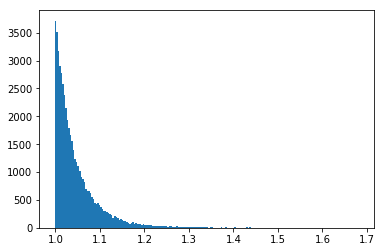

In [37]:
#call instance of class with new equilibrium prices
f = ExchangeEconomy(betas, newelist, N, newp1, newp2, gamma)

#calculate utility in equilibrium
util = f.utility()

#create histogram
plt.hist(util, 200)
plt.show

#print stats
print(f"Mean is {np.mean(util):.3f}")
print(f"Variance is {np.var(util):.3f}")

In the new more equal economy the mean is slightly higher while the variance is a lot lower. The change in endowments lead to a more fair distribution of utitility.

We further examine the effect of the parameter gamma by creating the function gammafind

In [38]:
def gammafind():
    """calculates mean and variance for the utility based on the parameter gamma
    Args:
        None
    
    Returns:
        Data (dataframe): dataframe containing mean, var and gamma data 
    """
    
    #allocate space
    gammalist = []
    meanlist = []
    varlist = []
    
    
    for i in range(100):
        
        #call instance of ExchangeEconomy
        g = ExchangeEconomy(betas, newelist, N, newp1, newp2, (i+1)/100)
        
        #calculate utility
        util = g.utility()
        
        #save data to lists 
        gammalist.append((i+1)/100)
        meanlist.append(np.mean(util))
        varlist.append(np.var(util))
        
    #create dataframe from lists
    data = pd.DataFrame()
    data["gamma"]=gammalist
    data["mean"]=meanlist
    data["var"]=varlist
    
    return data

#call instance of gamma and time it
%time data = gammafind()

Wall time: 16.6 s


Text(0, 0.5, 'var')

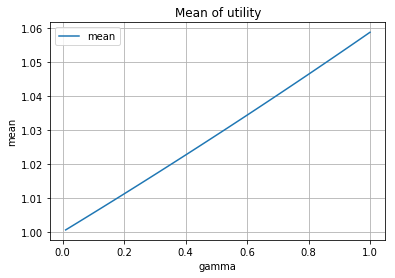

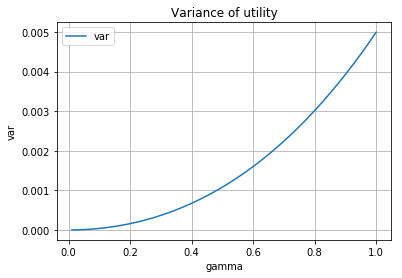

In [39]:
#plot data from gammafind

data.plot(0,1)
plt.grid(True)
plt.title("Mean of utility")
plt.ylabel("mean")

data.plot(0,2)
plt.grid(True)
plt.title("Variance of utility")
plt.ylabel("var")

Both mean and variance is increasing in gamma meaning higher gamma values results in higher average mean but also larger spread, which could be seen as a sort of inequality